In [1]:
import torch
from torchvision import datasets, transforms
from torch import nn, optim
import helper

Fashion-MNIST is a set of 28x28 greyscale images of clothes

In [2]:
import torch
from torchvision import datasets, transforms

# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

# Training & Predicting - Without Dropout

In [9]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)          #Initailizing Adam Optimizer with Learnrate = 0.003

epochs = 30
train_losses, test_losses = [], []
for i in range(epochs):                                         #Each epoch trains NN with 938 batches of 64 images, labels
    running_loss = 0
    for images, labels in trainloader:                          #Loading batch of 64 images(Shape 64,1,28,28), labels in each iteration
        images = images.view(len(images),-1)                    #Reshaping batch of 64 images into single vector (64,784) or (64,28*28)
        logps = model(images)                                   #Forward pass      
        loss = criterion(logps, labels)                         #Calculating loss
        
        optimizer.zero_grad()                                   #Clear the gradients, else gradients are accumulated
        loss.backward()                                         #Calculating gradient
        optimizer.step()                                        #Back Propogation - updating weights
        running_loss += loss.item()
    
    else:
        loss_test = 0
        accuracy = 0
        with torch.no_grad():                                              #Turn off Gradients
            for images, labels in testloader:
                images = images.view(len(images),-1)
                logps_test = model(images)
                loss_test += criterion(logps_test,labels)
                
                ps_test = torch.exp(logps_test)                            #Calculate prediction probabilities
                top_ps, top_class = ps_test.topk(1, dim = 1)               #Obtain top-k values (probabilities) & top-k indices(class)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
                
    
        train_losses.append(running_loss/len(trainloader))
        test_losses.append(loss_test/len(testloader))
                
        print("Epoch: {}/{}.. ".format(i+1, epochs),
              "Training Loss: {:.3f}.. ".format(running_loss/len(trainloader)),
              "Test Loss: {:.3f}.. ".format(loss_test/len(testloader)),
              "Test Accuracy: {:.3f}".format(accuracy/len(testloader)))

Epoch: 1/30..  Training Loss: 0.516..  Test Loss: 0.479..  Test Accuracy: 0.825
Epoch: 2/30..  Training Loss: 0.397..  Test Loss: 0.435..  Test Accuracy: 0.837
Epoch: 3/30..  Training Loss: 0.357..  Test Loss: 0.402..  Test Accuracy: 0.854
Epoch: 4/30..  Training Loss: 0.334..  Test Loss: 0.399..  Test Accuracy: 0.860
Epoch: 5/30..  Training Loss: 0.315..  Test Loss: 0.375..  Test Accuracy: 0.868
Epoch: 6/30..  Training Loss: 0.304..  Test Loss: 0.354..  Test Accuracy: 0.875
Epoch: 7/30..  Training Loss: 0.295..  Test Loss: 0.367..  Test Accuracy: 0.870
Epoch: 8/30..  Training Loss: 0.281..  Test Loss: 0.399..  Test Accuracy: 0.867
Epoch: 9/30..  Training Loss: 0.280..  Test Loss: 0.370..  Test Accuracy: 0.871
Epoch: 10/30..  Training Loss: 0.271..  Test Loss: 0.373..  Test Accuracy: 0.870
Epoch: 11/30..  Training Loss: 0.262..  Test Loss: 0.371..  Test Accuracy: 0.873
Epoch: 12/30..  Training Loss: 0.252..  Test Loss: 0.360..  Test Accuracy: 0.875
Epoch: 13/30..  Training Loss: 0.250.

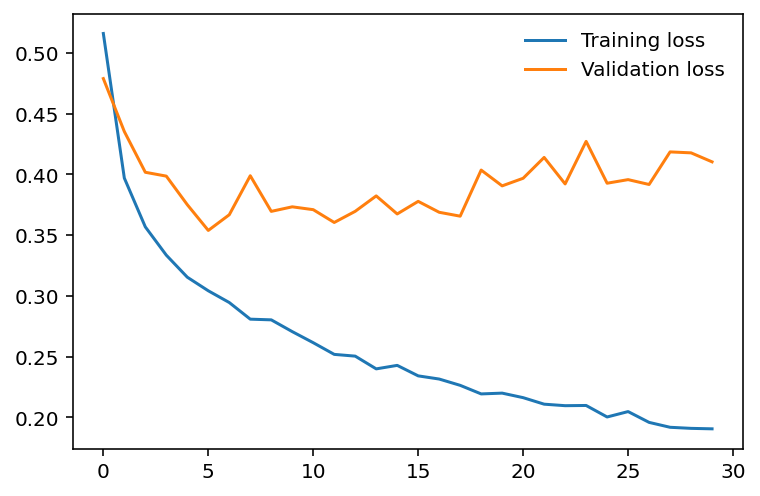

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

plt.plot(train_losses, label='Training loss')
plt.plot(test_losses, label='Validation loss')
plt.legend(frameon=False)

# Training & Predicting - with Dropout

In [15]:
model = nn.Sequential(nn.Linear(784,256),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(256,128),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Dropout(p=0.2),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1))
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.003)

epochs = 30
trainlosses, testlosses = [], []
for i in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(len(images),-1)
        logps = model(images)
        loss = criterion(logps, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        running_loss += loss
    else:
        loss_test = 0
        accuracy = 0
        with torch.no_grad():
            model.eval()
            for images, labels in testloader:
                images = images.view(len(images), -1)
                logps_test = model(images)
                loss_test += criterion(logps_test, labels)
                
                ps_test = torch.exp(logps_test)
                top_ps, top_class = ps_test.topk(1, dim = 1)
                equals = top_class == labels.view(*top_class.shape)
                accuracy += torch.mean(equals.type(torch.FloatTensor))
        
        trainlosses.append(running_loss/len(trainloader))
        testlosses.append(loss_test/len(testloader))
        
        model.train()
  
        print(f"Epoch: {i+1}/{epochs}  ",
              f"Train Loss: {running_loss/len(trainloader):.3f}  ",
              f"Test Loss: {loss_test/len(testloader):.3f}  ",
              f"Test Accuracy: {accuracy/len(testloader):.3f}")

Epoch: 1/30   Train Loss: 0.612   Test Loss: 0.458   Test Accuracy: 0.834
Epoch: 2/30   Train Loss: 0.488   Test Loss: 0.429   Test Accuracy: 0.846
Epoch: 3/30   Train Loss: 0.448   Test Loss: 0.415   Test Accuracy: 0.849
Epoch: 4/30   Train Loss: 0.430   Test Loss: 0.445   Test Accuracy: 0.828
Epoch: 5/30   Train Loss: 0.420   Test Loss: 0.410   Test Accuracy: 0.855
Epoch: 6/30   Train Loss: 0.413   Test Loss: 0.393   Test Accuracy: 0.862
Epoch: 7/30   Train Loss: 0.401   Test Loss: 0.414   Test Accuracy: 0.858
Epoch: 8/30   Train Loss: 0.406   Test Loss: 0.397   Test Accuracy: 0.861
Epoch: 9/30   Train Loss: 0.396   Test Loss: 0.406   Test Accuracy: 0.858
Epoch: 10/30   Train Loss: 0.393   Test Loss: 0.491   Test Accuracy: 0.834
Epoch: 11/30   Train Loss: 0.385   Test Loss: 0.381   Test Accuracy: 0.869
Epoch: 12/30   Train Loss: 0.383   Test Loss: 0.385   Test Accuracy: 0.864
Epoch: 13/30   Train Loss: 0.379   Test Loss: 0.410   Test Accuracy: 0.861
Epoch: 14/30   Train Loss: 0.382  

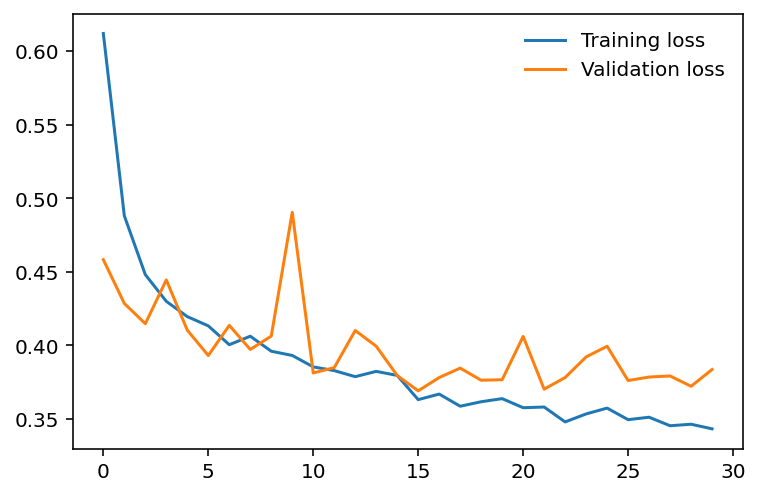

In [18]:
plt.plot(trainlosses, label='Training loss')
plt.plot(testlosses, label='Validation loss')
plt.legend(frameon=False)